<a href="https://colab.research.google.com/github/happyhillll/AI-with-python/blob/main/5%EC%9E%A5_%EB%94%A5%EB%9F%AC%EB%8B%9D_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [ ]:
#MNIST 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

MNIST:  (60000, 28, 28) (60000,) (60000, 10)


In [ ]:
#CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫코드로 변환
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)


In [ ]:
#Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫코드로 변환
print("Boston Housing: ",x_train.shape,y_train.shape,yy_train.shape)

65536/57026 [==================================] - 0s 0us/step
Boston Housing:  (404, 13) (404,) (404, 10)


In [ ]:
#Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫코드로 변환
print("Reuters: ",x_train.shape,y_train.shape,yy_train.shape)

2121728/2110848 [==============================] - 0s 0us/step
Reuters:  (8982,) (8982,) (8982, 10)


### 텐서플로로 퍼셉트론 프로그래밍

#### OR 데이터 인식

In [2]:
import tensorflow as tf

In [3]:
#OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

In [4]:
#퍼셉트론의 가중치 설정
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

Variable : 신경망의 가중치

In [ ]:
#퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b) #matmul:두 행렬을 곱해줌
o=tf.sign(s)

In [ ]:
print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


### 퍼셉트론 학습

In [5]:
import tensorflow as tf

In [6]:
#OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

#가중치 초기화 
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5)) #-0.5와 0.5 사이ㅣ의 난수를 설정, 바이어스는 0
b=tf.Variable(tf.zeros([1]))

#옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1) #최적 알고리즘 : 경사 하강법 (SGD) 사용하여 객체 opt에 저장, 학습률 = 0.1

#전방 계산
def forward():
  s=tf.add(tf.matmul(x,w),b) #matmul 함수 : 두 행렬을 곱해준다. 
  o=tf.tanh(s)  #계단 함수는 불연속점이 있어 미분이 어려움
  return o

#손실 함수 정의
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

#500세대까지 학습 (100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss,var_list=[w,b])
  if(i%100==0):print('loss at epoch',i,'=',loss().numpy())

#학습된 퍼셉트론으로 OR데이터 예측
o=forward()
print(o)


loss at epoch 0 = 0.91236615
loss at epoch 100 = 0.09476658
loss at epoch 200 = 0.043055438
loss at epoch 300 = 0.026907288
loss at epoch 400 = 0.019320048
tf.Tensor(
[[-0.8155707 ]
 [ 0.88591003]
 [ 0.8859202 ]
 [ 0.9992568 ]], shape=(4, 1), dtype=float32)


## MNIST 인식 
> 텐서플로로 다층 퍼셉트론 프로그래밍

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [8]:
from tensorflow.keras.models import Sequential # models,layers,optimizers 불러오기
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [12]:
#MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)  #텐서 모양 변환 : 28x28 크기의 2차원 텐서를 1차원 텐서로 변환
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 #ndarray로 변환 : 정수를 실수형으로 바꾸고 > [0,255] 범위를 [0,1] 범위로 정규화 한다.
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환한다.
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
#신경망 구조 설계

#노드 개수 정하기
n_input=784 #입력층
n_hidden=1024 #은닉층
n_output=10 #출력층

In [15]:
#모델을 생성하고 두 층을 쌓는다
mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),
              kernel_initializer='random_uniform',bias_initializer='zeros')) #은닉층을 추가> input_shape:입력층을 설정, units:현재 쌓고 있는 은닉층 설정
mlp.add(Dense(units=n_output,activation='tanh',
              kernel_initializer='random_uniform',bias_initializer='zeros')) #출력층 추가

In [16]:
#신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001), 
            metrics=['accuracy']) 
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2) #hist로 학습 곡선을 그린다. 학습 도중에 테스트 집합을 검증 용도로 사용한다.

Epoch 1/30
469/469 - 11s - loss: 0.0428 - accuracy: 0.8444 - val_loss: 0.0284 - val_accuracy: 0.9134 - 11s/epoch - 22ms/step
Epoch 2/30
469/469 - 10s - loss: 0.0223 - accuracy: 0.9304 - val_loss: 0.0181 - val_accuracy: 0.9464 - 10s/epoch - 21ms/step
Epoch 3/30
469/469 - 10s - loss: 0.0165 - accuracy: 0.9485 - val_loss: 0.0145 - val_accuracy: 0.9517 - 10s/epoch - 21ms/step
Epoch 4/30
469/469 - 10s - loss: 0.0138 - accuracy: 0.9571 - val_loss: 0.0134 - val_accuracy: 0.9572 - 10s/epoch - 21ms/step
Epoch 5/30
469/469 - 9s - loss: 0.0122 - accuracy: 0.9635 - val_loss: 0.0122 - val_accuracy: 0.9607 - 9s/epoch - 20ms/step
Epoch 6/30
469/469 - 7s - loss: 0.0110 - accuracy: 0.9676 - val_loss: 0.0116 - val_accuracy: 0.9615 - 7s/epoch - 15ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0102 - accuracy: 0.9709 - val_loss: 0.0103 - val_accuracy: 0.9667 - 6s/epoch - 14ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0095 - accuracy: 0.9733 - val_loss: 0.0102 - val_accuracy: 0.9676 - 6s/epoch - 14ms/step
Epoch 9/

In [17]:
#성능 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 97.63000011444092


## 학습 곡선 시각화

In [18]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_

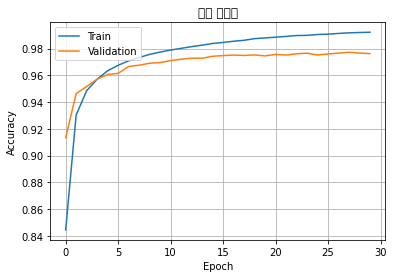

In [19]:
#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('모델 정확도')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_

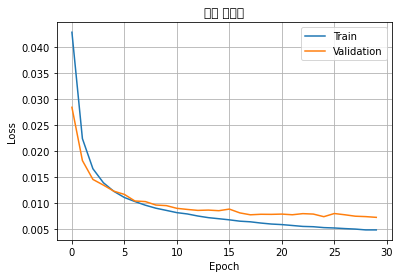

In [20]:
#손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('모델 손실도')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.grid()
plt.show()